<a href="https://colab.research.google.com/github/Aqeedathussain/autonomous-nav-classifier/blob/main/Predictive_Robot_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Robot Behavior

Importing the Dataset:

In [ ]:
# Importing the Libraries and Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

col_names = [f"US{i}" for i in range(1, 25)] + ["Class"]

df = pd.read_csv('/content/sensor_readings_24.data', header=None, names=col_names)

df

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US16,US17,US18,US19,US20,US21,US22,US23,US24,Class
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,Move-Forward
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,Sharp-Right-Turn
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,Sharp-Right-Turn
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,Move-Forward


**Labelencoding** the Class column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
df

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US16,US17,US18,US19,US20,US21,US22,US23,US24,Class
0,0.438,0.498,3.625,3.645,5.000,2.918,5.000,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,3
1,0.438,0.498,3.625,3.648,5.000,2.918,5.000,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,3
2,0.438,0.498,3.625,3.629,5.000,2.918,5.000,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,3
3,0.437,0.501,3.625,3.626,5.000,2.918,5.000,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,3
4,0.438,0.498,3.626,3.629,5.000,2.918,5.000,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451,0.910,5.000,3.997,2.785,2.770,2.572,2.433,1.087,1.772,1.040,...,0.660,0.648,0.657,0.686,5.000,1.045,5.000,5.000,1.562,0
5452,0.926,5.000,4.015,2.792,2.777,2.571,1.768,1.071,1.762,1.021,...,0.652,0.640,0.649,1.593,1.616,1.058,5.000,5.000,1.085,1
5453,0.937,5.000,4.034,2.799,2.784,2.571,1.754,1.053,1.752,1.002,...,0.648,0.633,0.642,0.741,5.000,1.065,5.000,5.000,1.105,1
5454,0.945,4.052,4.052,2.809,2.791,2.441,1.757,1.034,1.743,0.983,...,0.641,0.626,0.635,0.754,5.000,1.076,5.000,5.000,1.118,0


Splitting the Data into training and testing data:

In [ ]:
from sklearn.model_selection import train_test_split

x=df.iloc[:, :-1]
y=df.iloc[:,-1]

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

Doing Robust Scaling:

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()

xtrain_scaled=scaler.fit_transform(x_train)
xtest_scaled=scaler.fit_transform(x_test)

Training and Evaluating the Models:

In [ ]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Importing the evaluation functions
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# Importing the GridSearchCV for the model selection
from sklearn.model_selection import GridSearchCV

models = [LogisticRegression(class_weight='balanced', max_iter=1000), KNeighborsClassifier(), SVC(class_weight='balanced'), RandomForestClassifier(class_weight='balanced')]

models_names = ["Logistic Regression", "KNN", "SVC", "RandomForest"]

# Selecting parameters for best model prediction
param_grids = {
    'Logistic Regression': {
        'C': [1.0], 'dual': [False], 'fit_intercept': [True]
    },
    'KNN': {
        'algorithm': ['auto'], 'leaf_size': [30], 'metric': ['minkowski']
    },
    'SVC': {
        'C': [1.0], 'break_ties': [False], 'cache_size': [200]
    },
    'RandomForest': {
        'bootstrap': [True], 'ccp_alpha': [0.0], 'class_weight': [None]
    }
}

# Creating empty list to store the evalution scores
accuracy_scores_list = []
precision_scores_list = []
f1_scores_list = []
recall_scores_list = []

# best model save
best_model_result = []
# best model score save
best_score = 0

best_model = None

# Tuning the models one by one
for model, name in zip(models, models_names):
    print('Tuning the model', name)

    # Tuning models using GridSearch CV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name],
                               scoring='f1_weighted',
                               cv=5,
                               n_jobs=-1,
                               refit=True)
    grid_search.fit(xtrain_scaled, y_train)

    # Extracting the best parameters
    best_params = grid_search.best_params_
    print('Beast parameters for ', name, 'are', best_params, '\n')

    # Evalute the current the best estimator
    current_estimator = grid_search.best_estimator_
    y_test_pred = current_estimator.predict(xtest_scaled)

    accuracy_scores_list.append(accuracy_score(y_test, y_test_pred))
    precision_scores_list.append(precision_score(y_test, y_test_pred, average='weighted', zero_division=0))
    f1_scores_list.append(f1_score(y_test, y_test_pred, average='weighted'))
    recall_scores_list.append(recall_score(y_test, y_test_pred, average='weighted'))

    # Selecting the best tunned model (overall best based on f1 score from GridSearchCV)
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = current_estimator

# Printing the best model name
print('The best tunned model is', best_model, '\n')

# Getting raw input from the user
try:
    raw_readings = [float(x) for x in input("Enter 24 sensor values: ").split()]

    # 2. Scaling the inputs with Robust Scaler
    if len(raw_readings) == 24:
        # Making the 2D list of the data
        scaled_readings = scaler.transform([raw_readings])

        # Making prediction using the scaled data
        prediction = best_model.predict(scaled_readings)

        # 4. Showing the result
        print(f"Robot Command: {prediction[0]}")

        # Output printing result
        if prediction[0] == 0:
            print('Move Forward\n')
        elif prediction[0] == 1:
            print('Sharp-Right-Turn\n')
        elif prediction[0] == 2:
            print('Slight-Left-Turn\n')
        elif prediction[0] == 3:
            print('Slight-Right-Turn\n')
        else:
            print('Sorry! i am confused\n')
    else:
        print("Please enter exactly 24 values.")
except ValueError:
    print("Invalid input.")

# Evaluating the models
y_test_pred = best_model.predict(xtest_scaled)

print('The accuracy_score of the ', best_model, 'is', accuracy_score(y_test, y_test_pred), '\n')

print('Precision Score of the', best_model, 'is' , precision_score(y_test, y_test_pred, average='weighted', zero_division=0), '\n')

print('The f1 score of the ', best_model, 'is', f1_score(y_test, y_test_pred, average='weighted'), '\n')

print('The recall score of the', best_model, 'is' , recall_score(y_test, y_test_pred, average='weighted'), '\n')

Tuning the model Logistic Regression
Beast parameters for  Logistic Regression are {'C': 1.0, 'dual': False, 'fit_intercept': True} 

Tuning the model KNN
Beast parameters for  KNN are {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski'} 

Tuning the model SVC
Beast parameters for  SVC are {'C': 1.0, 'break_ties': False, 'cache_size': 200} 

Tuning the model RandomForest
Beast parameters for  RandomForest are {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None} 

The best tunned model is RandomForestClassifier() 

Enter 24 sensor values: 0.45 0.52 0.41 0.38 0.55 0.42 0.48 0.50 0.45 0.42 0.40 0.45 0.95 1.10 1.25 1.05 0.90 0.85 0.95 0.92 0.88 0.85 0.90 0.95
Robot Command: 1
Sharp-Right-Turn

The accuracy_score of the  RandomForestClassifier() is 0.8617216117216118 

Precision Score of the RandomForestClassifier() is 0.8870443976524472 

The f1 score of the  RandomForestClassifier() is 0.8554561654186584 

The recall score of the RandomForestClassifier() is 0.8617216117216

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


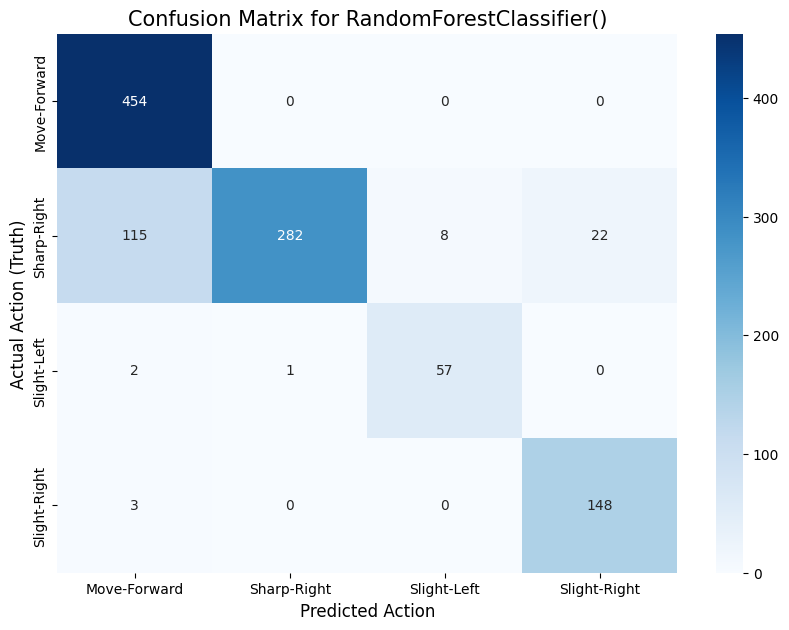

In [ ]:
from sklearn.metrics import confusion_matrix

# 1. Get Predictions from your Best Model
y_pred = best_model.predict(xtest_scaled)

# 2. Define the Class Names (So the plot is readable)
class_names = ['Move-Forward', 'Sharp-Right', 'Slight-Left', 'Slight-Right']

# 3. Create the Matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Action', fontsize=12)
plt.ylabel('Actual Action (Truth)', fontsize=12)
plt.title(f'Confusion Matrix for {best_model}', fontsize=15)
plt.show()